# Use Python To Implement KNN

## Step1: import useful packages

In [3]:
from sklearn.datasets import make_blobs   # this for creating data
from sklearn.neighbors import KNeighborsClassifier   # this for function knn
import matplotlib.pyplot as plt    # this for visualization
from sklearn.model_selection import train_test_split  # this for ...?

## Step2: generate training data

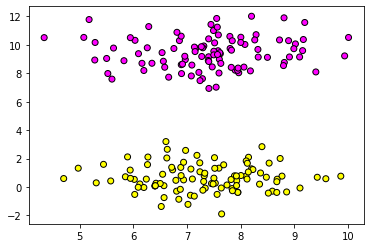

In [6]:
data = make_blobs(n_samples=200, centers=2, random_state=8)
X, y =data
plt.scatter(X[:,0], X[:,1],c=y,cmap=plt.cm.spring,edgecolor='k')
plt.show()

In [11]:
data[0][1:5,:], data[1][1:5], type(data)

(array([[ 6.80526026, -0.2909292 ],
        [ 7.07978644,  7.81427747],
        [ 6.87472003, -0.16069949],
        [ 8.06164078,  8.43736968]]),
 array([1, 0, 1, 0]),
 tuple)

## Step3: use function to solve the model

In [13]:
import numpy as np
clf = KNeighborsClassifier()
clf.fit(X, y)

KNeighborsClassifier()

## Step4: visualize the results

First, generate the filling points in the rectangula.  
Secondly, draw data points with different shape and color

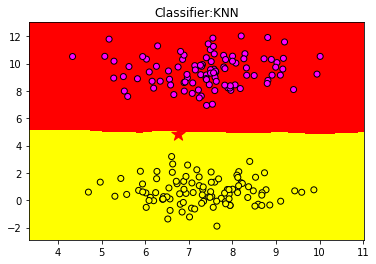

In [19]:
x_min,x_max = X[:,0].min()-1, X[:,0].max()+1
y_min,y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max,0.02), np.arange(y_min,y_max,0.02))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap=plt.cm.autumn)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.spring,edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:KNN")
plt.scatter(6.75, 4.82, marker="*",c="red",s=200)
plt.show()

use `predict` method to predict the classification of the new data.

In [20]:
clf.predict([[6.75, 4.82]])

array([1])

## implementing multiple types of data

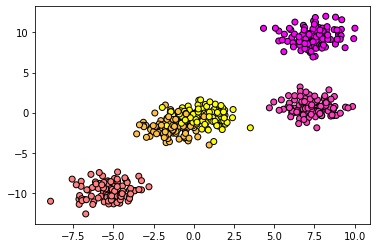

In [21]:
data2 = make_blobs(n_samples=500, centers=5, random_state=8)
x2, y2 = data2
plt.scatter(x2[:,0],x2[:,1],c=y2,cmap=plt.cm.spring,edgecolor='k')
plt.show()

In [22]:
clf = KNeighborsClassifier()
clf.fit(x2,y2)

KNeighborsClassifier()

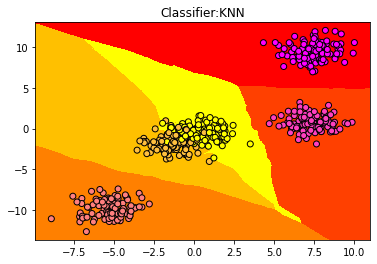

In [23]:
x_min,x_max = x2[:,0].min()-1, x2[:,0].max()+1
y_min,y_max = x2[:,1].min()-1, x2[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max,0.02), np.arange(y_min,y_max,0.02))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap=plt.cm.autumn)
plt.scatter(x2[:,0],x2[:,1],c=y2,cmap=plt.cm.spring,edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:KNN")
plt.show()

Use `score` method to predict the correction rate of the model 

In [24]:
clf.score(x2,y2)

0.956

## implementing KNN Regression With Different `n_neighbors`

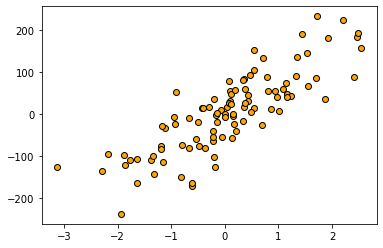

In [25]:
from sklearn.datasets import make_regression
x, y = make_regression(n_features=1, n_informative=1, noise=50, random_state=8)
plt.scatter(x, y, c='orange', edgecolor='k')
plt.show()

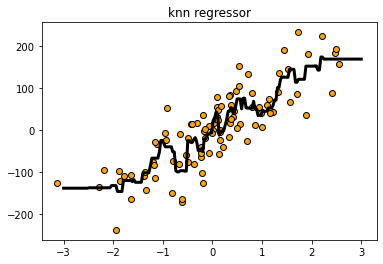

In [26]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
reg.fit(x, y)
z = np.linspace(-3,3,200).reshape(-1, 1)
plt.scatter(x,y,c='orange',edgecolor='k')
plt.plot(z, reg.predict(z),c='k',linewidth=3)
plt.title('knn regressor')
plt.show()

In [27]:
reg.score(x,y)

0.7721167832505298

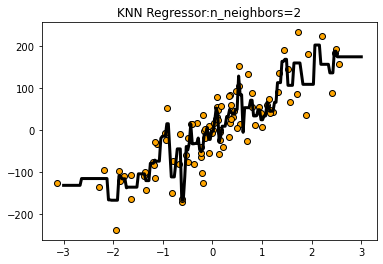

In [28]:
from sklearn.neighbors import KNeighborsRegressor
reg2 = KNeighborsRegressor(n_neighbors=2)
reg2.fit(x,y)
plt.scatter(x,y,c='orange',edgecolor='k')
plt.plot(z, reg2.predict(z), c='k', linewidth=3)
plt.title('KNN Regressor:n_neighbors=2')
plt.show()

In [29]:
reg2.score(x, y)

0.8581798802065704

## An Example Of Wine_Classification 

In [30]:
from sklearn.datasets import load_wine
wine_dataset = load_wine()
wine_dataset.keys(), type(wine_dataset)   # pay an attention to the type of wine_dataset

(dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']),
 sklearn.utils.Bunch)

In [31]:
wine_dataset['data'].shape   # to see the numbers of observations and variables

(178, 13)

In [33]:
print(wine_dataset['DESCR'])    # to see the description about the dataset

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Use `train_test_split` function to generate the training data and test data.

In [36]:
x_train,x_test,y_train,y_test = train_test_split(wine_dataset['data'],wine_dataset['target'],random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [37]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
print(knn)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)


KNeighborsClassifier(n_neighbors=1)

In [38]:
knn.score(x_train,y_train), knn.score(x_test, y_test)

(1.0, 0.7555555555555555)

In [39]:
X_new = np.array([[13.2,2.77,2.51,18.5,96.6,1.04,2.55,0.57,1.47,6.2,1.05,3.33,820]])
prediction = knn.predict(X_new)
wine_dataset['target_names'][prediction]

array(['class_2'], dtype='<U7')